# Mooring Synthesis of Initial NC data (offline)

## 11BS-5A

- from netcdf files
- plot all depths of each parameter on each other for comparative purposes
- Temperature, Salinity, Pressure in this notebook.  See companion for Oxygen, Chlor, ADCP/currents, etc

In [1]:
import xarray as xa
import pandas as pd
import numpy as np
import cmocean

In [3]:
#wrap the plot in image settings for visual appeal
# may be able to make this cleaner or just a preset
%run '../../../settings/mpl_plot_settings.py'

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker


In [31]:
ncfiles = '/Users/bell/ecoraid/2011/Moorings/11bs5b/working/11bs5*.nc'
# ncfiles = '22bs*.nc'
mfd = xa.open_mfdataset(ncfiles, chunks=None)
mfd

<xarray.Dataset>
Dimensions:  (time: 84787, depth: 15, lat: 1, lon: 1)
Coordinates:
  * time     (time) datetime64[ns] 2011-09-24T17:00:00 ... 2012-08-11T02:00:00
  * depth    (depth) float32 17.0 18.0 20.0 23.0 27.0 ... 55.0 60.0 61.0 67.0
  * lat      (lat) float32 59.91
  * lon      (lon) float32 171.7
Data variables:
    S_41     (time, depth, lat, lon) float32 dask.array<chunksize=(84787, 5, 1, 1), meta=np.ndarray>
    C_50     (time, depth, lat, lon) float32 dask.array<chunksize=(84787, 5, 1, 1), meta=np.ndarray>
    T_20     (time, depth, lat, lon) float32 dask.array<chunksize=(84787, 3, 1, 1), meta=np.ndarray>
    P_1      (time, depth, lat, lon) float32 dask.array<chunksize=(84787, 3, 1, 1), meta=np.ndarray>
Attributes: (12/14)
    CREATION_DATE:        June 24, 2020 21:14 UTC
    COMPOSITE:            1
    INST_TYPE:            ascii
    DATA_CMNT:            
    EPIC_FILE_GENERATOR:  nc_epic2udunits_time.py V0.4.0
    PROG_CMNT01:          
    ...                   ...
    MOORING:              11bs5b
    WATER_MASS:           B
    EXPERIMENT:           efoci
    PROJECT:              efoci
    History:              \nJune 24, 2020 21:14 UTC EPIC two time-word key co...
    featureType:

In [21]:
mfd =mfd.where(mfd.T_20 <1e34,np.nan)

## Temperature (full temporal resolution)

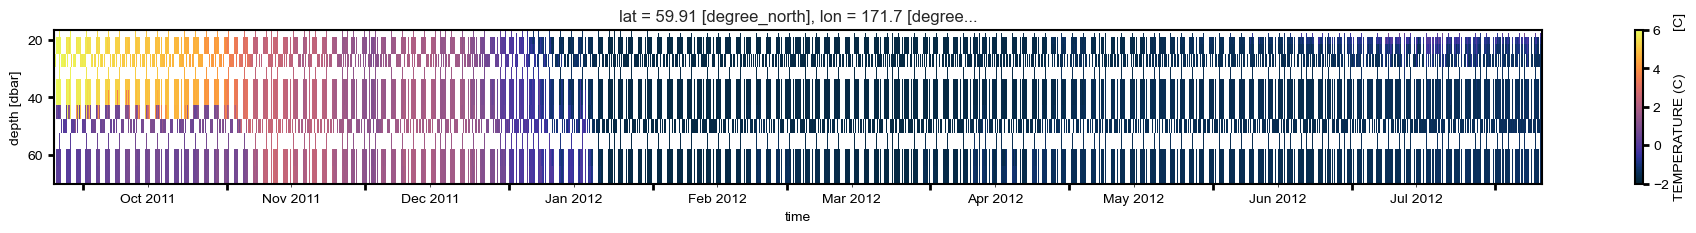

In [22]:
upper_temp = mfd.T_20.max(axis=0).max(axis=0).values
lower_temp = -2

fig, ax = plt.subplots(1,figsize=(24, 2))
mfd.T_20.T.plot(ax=ax,yincrease=False,vmin=lower_temp,vmax=upper_temp,cmap=cmocean.cm.thermal)


ax.xaxis.set_major_locator(DayLocator(bymonthday=1))
ax.xaxis.set_minor_locator(DayLocator(bymonthday=15))
ax.xaxis.set_minor_formatter(DateFormatter('%b %Y'))
ax.xaxis.set_major_formatter(DateFormatter(''))
ax.xaxis.set_tick_params(which='major', pad=3)
ax.xaxis.set_tick_params(which='minor', pad=5)

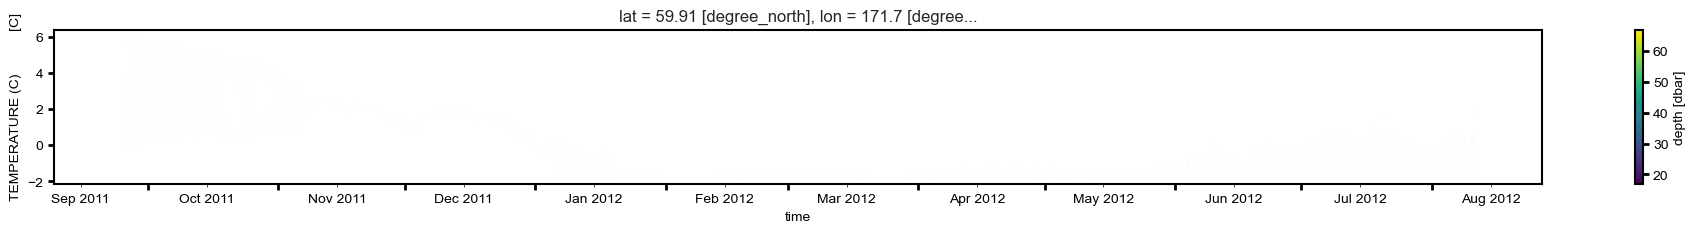

In [23]:
fig, ax = plt.subplots(1,figsize=(24, 2))
mfd.isel(lat=0,lon=0).plot.scatter(x="time",y="T_20",hue="depth",s=1,ax=ax)


ax.xaxis.set_major_locator(DayLocator(bymonthday=1))
ax.xaxis.set_minor_locator(DayLocator(bymonthday=15))
ax.xaxis.set_minor_formatter(DateFormatter('%b %Y'))
ax.xaxis.set_major_formatter(DateFormatter(''))
ax.xaxis.set_tick_params(which='major', pad=3)
ax.xaxis.set_tick_params(which='minor', pad=5)

**Note:** not everything has constant sample frequencies so if nan's are in the mix, then lineplots are less useful (see plot below)
Will want to resample to hourly or daily to evaluate those

In [24]:
import datetime

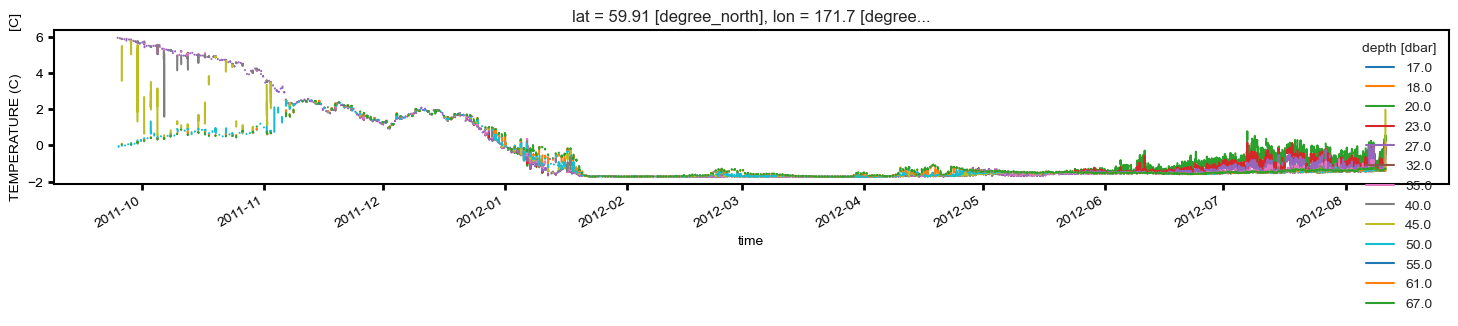

In [27]:
fig, ax = plt.subplots(1,figsize=(18, 2))
mfd.T_20.isel(lat=0,lon=0).plot.line(x="time",hue="depth",ax=ax);

## Salinity(full temporal resolution)

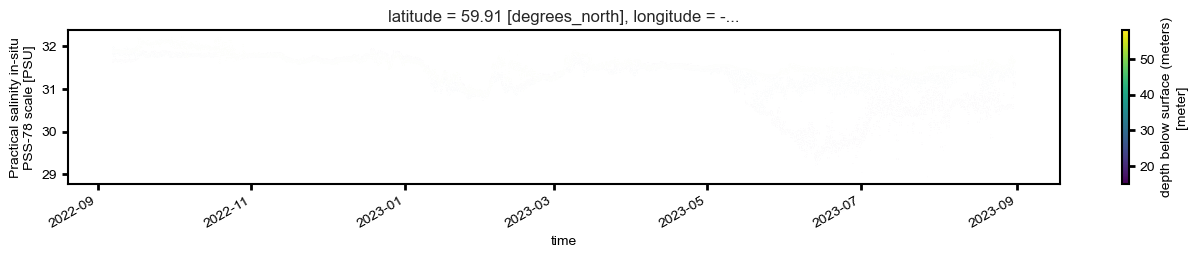

In [8]:
fig, ax = plt.subplots(1,figsize=(16, 2))
mfd.isel(latitude=0,longitude=0).plot.scatter(x="time",y="salinity",hue="depth",s=1,ax=ax)

## Pressure (full temporal resolution)

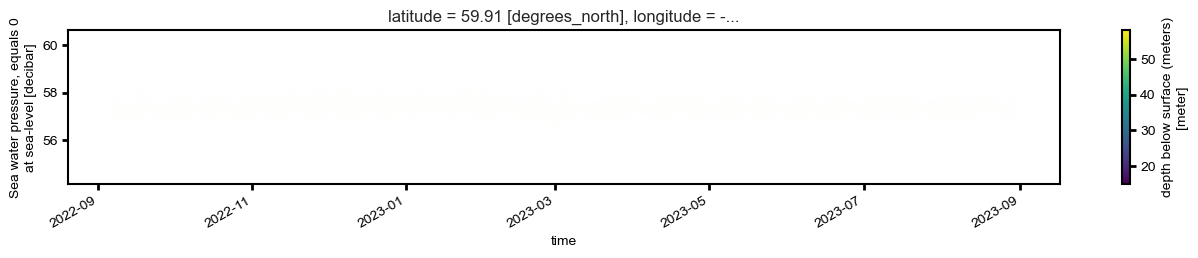

In [9]:
fig, ax = plt.subplots(1,figsize=(16, 2))
mfd.isel(latitude=0,longitude=0).plot.scatter(x="time",y="pressure",hue="depth",s=1,ax=ax)

## Hourly/Interpolated plots Plots

Because of the different timebases... quickly either interpolate (linearly) or downsample (this seems slower) to plot all series

In [28]:
# mfd_hourly = mfd.resample(time='1H').median() #not fast
mfd_up = (mfd.interpolate_na("time")).resample({'time':'1H'}).mean()

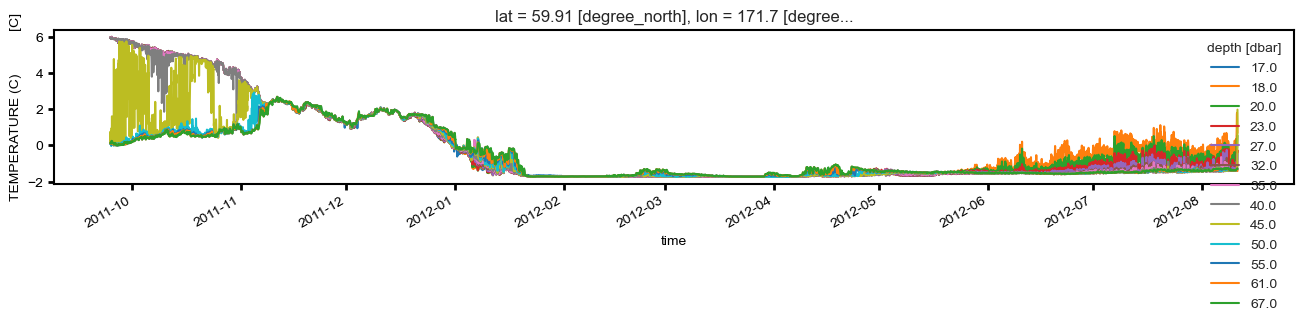

In [30]:
fig, ax = plt.subplots(1,figsize=(16, 2))
mfd_up.T_20.plot(x="time",hue="depth",ax=ax)

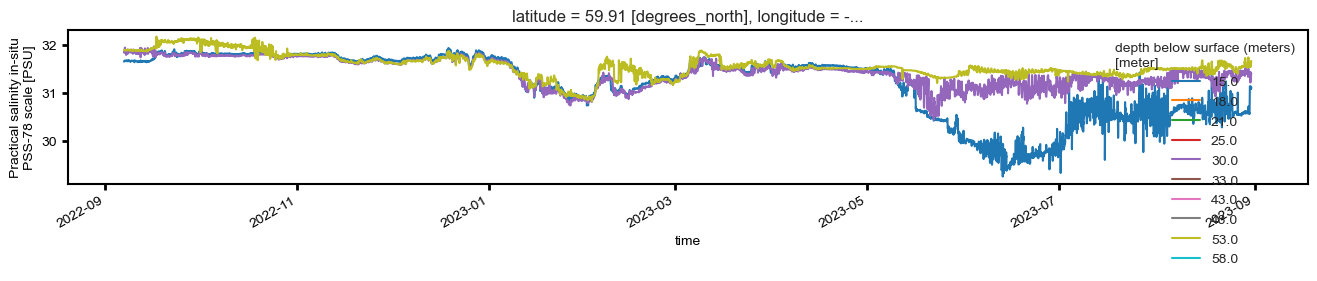

In [12]:
fig, ax = plt.subplots(1,figsize=(16, 2))
mfd_up.salinity.plot(x="time",hue="depth",ax=ax);
# ax.set_ylim([30.5,33.5])

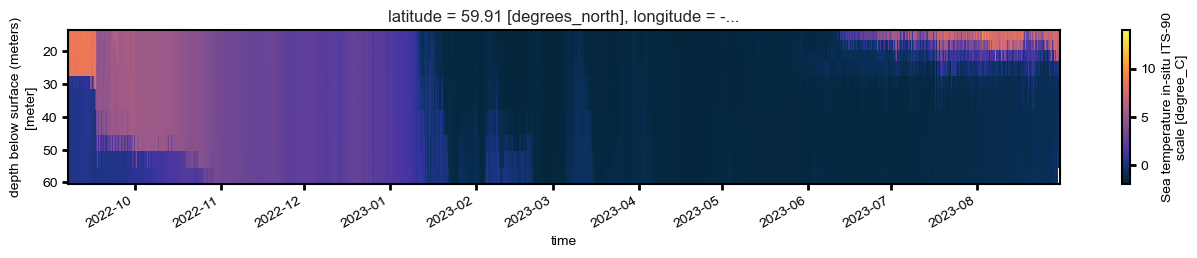

In [13]:
upper_temp = mfd_up.T_20.max(axis=0).max(axis=0).values
lower_temp = -2

fig, ax = plt.subplots(1,figsize=(16, 2))
mfd_up.T_20.T.plot(ax=ax,yincrease=False,vmin=lower_temp,vmax=14,cmap=cmocean.cm.thermal)

## Compare Timeseries to CTD Casts


- Recovery CTDXXX on Sikuliaq cruise, not yet obtained.

In [15]:
import EcoFOCIpy.io.erddap as erddap

In [16]:
url = "http://ecofoci-field.pmel.noaa.gov:8082/erddap"

erddap.test_erddap_connection(url=url) #basic test for connection to internal server, no response is a good thing

In [17]:
#grap deploy/recover cast data from erddap hosted sets - you have to know which profile you want though
# depcast = erddap.erddapCTDretrieve(url=url,cruiseid='dy2206',qclevel='preliminary',concastno='001')
reccast = erddap.erddapCTDretrieve(url=url,cruiseid='aq2301',qclevel='preliminary',concastno='019')


## QC Notes



(PJS needs to vet these)

## Generate to_edit files for PJS

- these are usually salinity focused and need the ctd casts as well as the salinity timeseries.
- save the native time scale, not the interpolated or upscaled version

In [32]:
with pd.ExcelWriter('11bs5a_temperature_to_edit.xlsx') as writer:  

    for depthkey in mfd.to_dataframe().T_20.groupby(level=[1]).groups.keys():
        if not (mfd.to_dataframe().T_20.groupby(level=[1]).get_group(depthkey).dropna(how='all')).empty:
            print(f'saving {depthkey}')
            (mfd.to_dataframe().T_20.groupby(level=[1]).get_group(depthkey).dropna(axis=0)).to_excel(writer, sheet_name=str(depthkey))

    # depcast.to_excel(writer, sheet_name=depcast.profile_id.unique()[0])
    # reccast.to_excel(writer, sheet_name=reccast.profile_id.unique()[0])

saving 17.0
saving 18.0
saving 20.0
saving 23.0
saving 27.0
saving 32.0
saving 35.0
saving 40.0
saving 45.0
saving 46.0
saving 50.0
saving 55.0
saving 60.0
saving 61.0
saving 67.0
